**Fashion MNIST Dataset Training**
*First we will import required libraries like **Tensorflow** and **keras** which uses tensorflow in backened*
*To handle dataset we will import **numpy library** and to plot respective curves or show images we will gonna import **matplotlib library**


In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
fashion_mnist = keras.datasets.fashion_mnist   # fashion mnist dataset is loaded using keras library 

In [0]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()      #Training and Testing datasets are splitted and downoaded in required varibales

In [0]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [38]:
train_images.shape                   #Here its returning the shape of train_images in a tuple as (NumberOfImages,ImageHeight,ImageWidth)

(60000, 28, 28)

In [39]:
train_labels                     #Train labels are images for which the model is training to predict accurate results

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [40]:
test_images.shape                     #Test Images shape which is returning a tuple as (NumberOfImages,ImageHeight,ImageWidth)

(10000, 28, 28)

In [41]:
test_labels                            #Test Labels used for testing the trained model

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

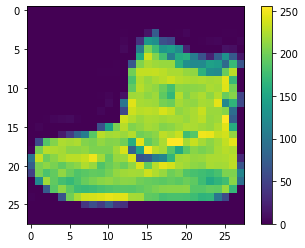

In [42]:
plt.figure()                                                   #returning the  train image in form of color bar and the image is of Ankle
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

*Training images and Testing images are being normalized below to get the values of pixels of images in between 0 and 1*

In [0]:
train_images = train_images / 255.0                   
test_images = test_images / 255.0

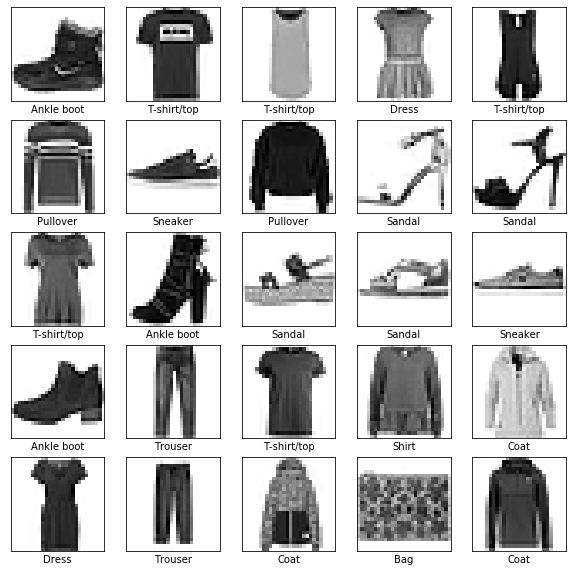

In [48]:
plt.figure(figsize=(10,10))                     #This is used to display images figures of the dataset with size of 10*10
for i in range(25):                             #Loop to display images 25 images and this loop work in range of 0-24 with 25 excluded
  plt.subplot(5,5,i+1)                          #This subplot is used to display a grid of images of 5 by 5 grid
  plt.xticks([])                                #Get or set the current tick locations and labels of the x-axis.(optional)
  plt.yticks([])                                #Get or set the current tick locations and labels of the y-axis.(optional)
  plt.grid()                                    
  plt.imshow(train_images[i],cmap=plt.cm.binary)  #This is used to plot the gray scale image on graph if will remove plt.xticks([]) and plt.yticks([]) then u will get the pixel values of x and y axis
  plt.xlabel(class_names[train_labels[i]])        
plt.show()

In [15]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),                       #This is basically flattening the grayscale image pixel matrix to a 1D matrix  
                          keras.layers.Dense(128,activation=tf.nn.relu),                   #Dense means hidden layers  
                          keras.layers.Dense(10,activation = tf.nn.softmax)               
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])       #To reduce the error we are using adam optimizer ,Adam optimizer basically is the combinations of momentum and RMSProp which are optimizers too.

In [17]:
model.fit(train_images,train_labels,epochs=10)                    #We are fitting the model with 10 epochs

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.4997 - acc: 0.8249
Epoch 2/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3748 - acc: 0.8654
Epoch 3/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3367 - acc: 0.8769
Epoch 4/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3138 - acc: 0.8842
Epoch 5/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2977 - acc: 0.8903
Epoch 6/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2829 - acc: 0.8948
Epoch 7/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2695 - acc: 0.8997
Epoch 8/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2581 - acc: 0.9032
Epoch 9/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2497 - acc: 0.9077
Epoch 10/10
60000/60000 [==============================] - 

In [18]:
test_loss , test_acc = model.evaluate(test_images,test_labels)      
print("Test accuracy ",test_acc)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.3327 - acc: 0.8861
Test accuracy  0.8861


In [0]:
predictions = model.predict(test_images)                  #predictions on test images 

In [20]:
predictions[0]                                          #which should same as test_label label

array([1.0280430e-06, 1.3343820e-09, 7.3188225e-08, 6.2215227e-10,
       1.7767309e-08, 5.4300763e-04, 7.0032140e-05, 1.3340499e-01,
       6.1219431e-08, 8.6598074e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])                             #argmax is returning maximum value which tells the class of images on predictions[0]

9

In [49]:
test_labels[0]                                        #Test label is same as of the np.argmax(predictions[0]) that means our model is trained well

9

In [0]:
def plot_image(i, predictions_array,true_label,img):
  predictions_array,true_label,img= predictions_array[i],true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label=np.argmax(predictions_array)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color=color)


In [0]:
def plot_value_array(i,predictions_array,true_label):
  predictions_array,true_label = predictions_array[i],true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array,color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

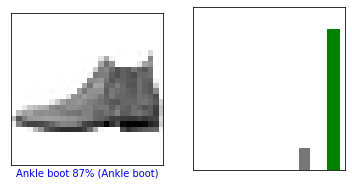

In [25]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

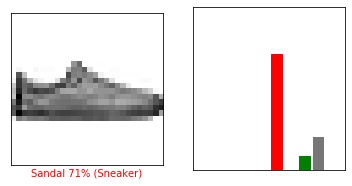

In [26]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

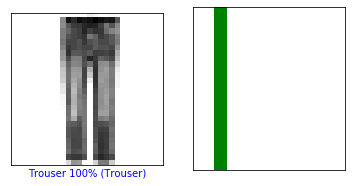

In [27]:
i=15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

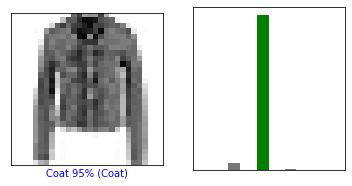

In [28]:
i=10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

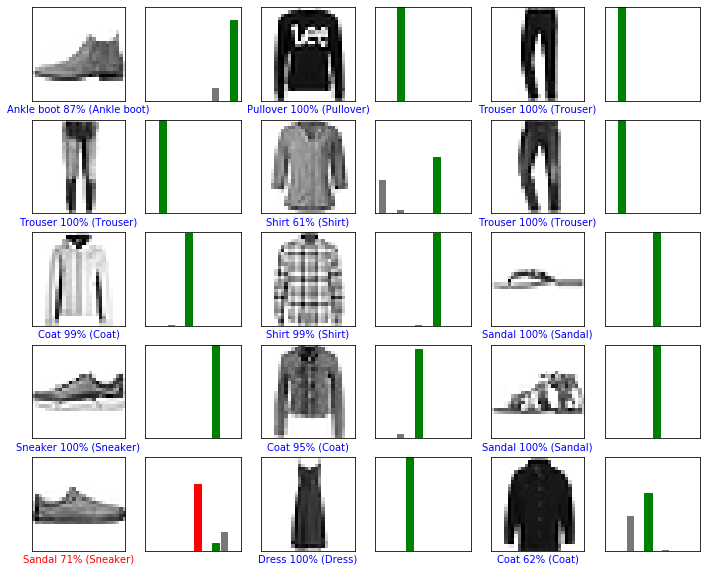

In [29]:
num_rows = 5
num_cols = 3
num_images = num_cols*num_rows
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,predictions,test_labels,test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions,test_labels)
plt.show()


In [30]:
img = test_images[0]
print(img.shape)

(28, 28)


In [31]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [32]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.0280480e-06 1.3343820e-09 7.3188083e-08 6.2215350e-10 1.7767343e-08
  5.4300763e-04 7.0032278e-05 1.3340500e-01 6.1219545e-08 8.6598074e-01]]


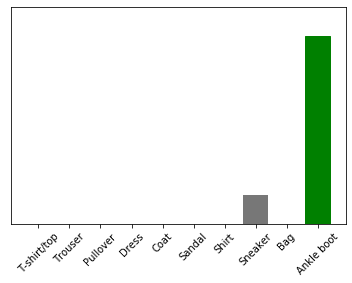

In [33]:
plot_value_array(0,predictions_single,test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)

In [34]:
np.argmax(predictions_single[0])

9